**Business Understanding**

Studying employee salary data in the city of San Francisco to understand the distribution of salaries, identify factors that influence wages, and identify any unusual patterns that may indicate problems or opportunities for improvement.

Extracting some information and insights to conduct the decision-making process effectively and efficiently, such as identifying the highest and lowest salaries and comparing them to the average salary, calculating the average salary for each year, measuring the impact of bonuses and additional benefits on the total income of employees, and searching for employees who receive unexpected salaries compared to their peers, such as the government sector versus the private sector, and large corporations versus startups.

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Salaries.csv')
df

<ipython-input-150-a0140cde6444>:5: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Salaries.csv')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


**Data Exploration**

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [152]:
df.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [153]:
df.tail(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [154]:
df.nunique()

,0
Id,148654
EmployeeName,110811
JobTitle,2159
BasePay,109900
OvertimePay,66555
OtherPay,84968
Benefits,99635
TotalPay,138486
TotalPayBenefits,142098
Year,4


In [155]:
# Check if there are any employees do not have a job
df['JobTitle']

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT)
3,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
...,...
148649,Custodian
148650,Not provided
148651,Not provided
148652,Not provided


In [156]:
# This returns all rows for the TotalPay and TotalPayBenefits columns where Year = 2011
df.loc[df['Year'] == 2011,['TotalPay','TotalPayBenefits']]
# This returns the rows from index 0 to 5 for the TotalPay and TotalPayBenefits columns
df.loc[:5,['TotalPay','TotalPayBenefits']]

,TotalPay,TotalPayBenefits
0,567595.43,567595.43
1,538909.28,538909.28
2,335279.91,335279.91
3,332343.61,332343.61
4,326373.19,326373.19
5,316285.74,316285.74


In [157]:
# This returns the rows with indexes 0-5 and the first three columns
df.iloc[0:6,[0,1,2]]

,Id,EmployeeName,JobTitle
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT)
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT)
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II


In [158]:
# Check datatypes -----> columns that have mixed data types are (Basepay-Overtimepay-Otherpay-Benefits)
df.dtypes

,0
Id,int64
EmployeeName,object
JobTitle,object
BasePay,object
OvertimePay,object
OtherPay,object
Benefits,object
TotalPay,float64
TotalPayBenefits,float64
Year,int64


In [159]:
# Check duplicates
df.duplicated().sum()

0

In [160]:
# Ensuring that there are not duplicates
df.drop(columns = 'Id', inplace = True)

In [161]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [162]:
df.duplicated().sum()

3

In [163]:
pd.DataFrame({'Null':df.isnull().sum()})

,Null
EmployeeName,0
JobTitle,0
BasePay,605
OvertimePay,0
OtherPay,0
Benefits,36159
TotalPay,0
TotalPayBenefits,0
Year,0
Notes,148654


In [164]:
(pd.DataFrame({'Pct_Null':df.isnull().sum()}) / df.shape[0]) * 100

,Pct_Null
EmployeeName,0.000000
JobTitle,0.000000
BasePay,0.406985
OvertimePay,0.000000
OtherPay,0.000000
Benefits,24.324270
TotalPay,0.000000
TotalPayBenefits,0.000000
Year,0.000000
Notes,100.000000


**Check irrelevant columns:**

**1- Notes -----> 100% nulls**

**2- Agency ---> SF**

In [165]:
df['Agency'].value_counts()

,count
Agency,
San Francisco,148654


In [166]:
df['Status'].value_counts()

,count
Status,
FT,22334
PT,15785


**preprocessing(cleaning data)**

In [167]:
# Drop irrelevant columns
df.drop(columns = ['Notes', 'Agency'], inplace = True)

In [168]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Status'],
      dtype='object')

In [169]:
# Drop duplicates
df.drop_duplicates(inplace = True)

In [170]:
df.duplicated().sum()

0

In [171]:
# Converting data type to numeric format
df['BasePay'] = pd.to_numeric(df['BasePay'], errors = 'coerce')
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'], errors = 'coerce')
df['OtherPay'] = pd.to_numeric(df['OtherPay'], errors = 'coerce')
df['Benefits'] = pd.to_numeric(df['Benefits'], errors = 'coerce')

In [172]:
df.dtypes

,0
EmployeeName,object
JobTitle,object
BasePay,float64
OvertimePay,float64
OtherPay,float64
Benefits,float64
TotalPay,float64
TotalPayBenefits,float64
Year,int64
Status,object


In [173]:
# Filling the missing values with zero
df['BasePay'].fillna(0, inplace = True)

<ipython-input-173-fe1423ff47cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BasePay'].fillna(0, inplace = True)


In [174]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148651.000000,148650.000000,148650.000000,112491.000000,148651.000000,148651.000000,148651.000000
mean,66055.062351,5066.059886,3648.767297,25007.893151,74769.830909,93694.445667,2012.522613
std,42886.117302,11454.380559,8056.601866,15402.215858,50516.398338,62792.756431,1.117529
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,32797.645000,0.000000,0.000000,11535.395000,36169.340000,44071.405000,2012.000000
50%,64862.220000,0.000000,811.270000,28628.620000,71427.220000,92406.010000,2013.000000
75%,94608.430000,4658.175000,4236.065000,35566.855000,105841.940000,132877.495000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


**Check Outliers**

In [205]:
# Calculating Interquartile Range
IQR = 94608.4 - 32797.6

# Define outlier bounds
lower_bound = 32797.6 - 1.5 * IQR
upper_bound = 94608.4 + 1.5 * IQR

# Find outliers
df.loc[(df['BasePay'] < lower_bound) | (df['BasePay'] > upper_bound), ['EmployeeName', 'BasePay']]

,EmployeeName,BasePay
2,ALBERT PARDINI,212739.13
7,DAVID KUSHNER,256576.96
9,JOANNE HAYES-WHITE,285262.00
10,ARTHUR KENNEY,194999.39
12,EDWARD HARRINGTON,294580.02
...,...,...
111279,Fariba Mahmoudi,189344.08
111310,Wilmie M Hathaway,188560.76
111317,Jignesh Desai,188189.15
111368,Elaine C Warren,191709.01


In [176]:
# Filling the missing values with median(so as not to be affected by outliers)
df['Benefits'].fillna(df['Benefits'].median(), inplace = True)

<ipython-input-176-61e7afc5f8e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Benefits'].fillna(df['Benefits'].median(), inplace = True)


In [177]:
df.drop(columns = 'Status' , inplace = True)

In [178]:
df.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year'],
      dtype='object')

In [179]:
df.isnull().sum()

,0
EmployeeName,0
JobTitle,0
BasePay,0
OvertimePay,1
OtherPay,1
Benefits,0
TotalPay,0
TotalPayBenefits,0
Year,0


In [180]:
df.dropna(subset = ['OvertimePay', 'OtherPay'], inplace = True)

In [181]:
df.isnull().sum()

,0
EmployeeName,0
JobTitle,0
BasePay,0
OvertimePay,0
OtherPay,0
Benefits,0
TotalPay,0
TotalPayBenefits,0
Year,0


**Exploratory Data Analysis**

**Check if there are employees whose salaries have not been determined?**

In [182]:
df.loc[(df['TotalPay'] == 0) & (df['TotalPayBenefits'] == 0), ['TotalPay', 'TotalPayBenefits']]

,TotalPay,TotalPayBenefits
36156,0.0,0.0
36157,0.0,0.0
36158,0.0,0.0
148626,0.0,0.0
148627,0.0,0.0
148628,0.0,0.0
148629,0.0,0.0
148630,0.0,0.0
148631,0.0,0.0
148632,0.0,0.0


**Who are the employees whose salaries have not been determined?**

In [183]:
df.loc[df[['TotalPay', 'TotalPayBenefits']].eq(0).all(axis=1), ['EmployeeName', 'TotalPay', 'TotalPayBenefits']]

,EmployeeName,TotalPay,TotalPayBenefits
36156,PAULETTE ADAMS,0.0,0.0
36157,KAUKAB MOHSIN,0.0,0.0
36158,JOSEPHINE MCCREARY,0.0,0.0
148626,Paulet Gaines,0.0,0.0
148627,Brett A Lundberg,0.0,0.0
148628,Mark W Mcclure,0.0,0.0
148629,Elizabeth Iniguez,0.0,0.0
148630,Randy J Keys,0.0,0.0
148631,Andre M Johnson,0.0,0.0
148632,Sharon D Owens-Webster,0.0,0.0


**The number of employees whose salaries have not been determined**

In [184]:
df.loc[(df['TotalPay'] == 0) & (df['TotalPayBenefits'] == 0), ['TotalPay', 'TotalPayBenefits']].value_counts()

,,count
TotalPay,TotalPayBenefits,
0.0,0.0,26


**What is the average BasePay?**

In [185]:
avg = df['BasePay'].mean()
print(f'The average BasePay is {avg}')

The average BasePay is 66055.50671772621


**What is the average BasePay for each year?**

In [186]:
avg_BasePay = df.groupby('Year')['BasePay'].mean()
avg_BasePay.sort_values(ascending = False)

,BasePay
Year,
2013,68509.832156
2014,66564.421924
2012,65436.406857
2011,63595.956517


**What is the highest BasePay?**

In [187]:
highest_BasePay = df['BasePay'].max()
print(f'The highest BasePay is {highest_BasePay}')

The highest BasePay is 319275.01


**What is the lowest BasePay?**

In [188]:
lowest_BasePay = df['BasePay'].min()
print(f'The lowest BasePay is {lowest_BasePay}')

The lowest BasePay is -166.01


**What is the average totalpaybenefits per year?**

In [189]:
avg_totalpaybenefits = df.groupby('Year')['TotalPayBenefits'].mean()
(pd.DataFrame({'Avg_TotalPayBenefits':avg_totalpaybenefits.sort_values(ascending = False)}))

,Avg_TotalPayBenefits
Year,
2013,101440.519714
2012,100553.229232
2014,100261.438668
2011,71744.103871


**What is the average BasePay for each job title?**

In [190]:
Avg_BasePay = df.groupby('JobTitle')['BasePay'].mean()
(pd.DataFrame({'Avg_BasePay':Avg_BasePay.sort_values(ascending = False)}))

,Avg_BasePay
JobTitle,
Chief of Police,309767.683333
"Chief, Fire Department",304232.340000
"Gen Mgr, Public Trnsp Dept",297769.413333
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.000000
"Dep Dir for Investments, Ret",276153.765000
...,...
PUBLIC SAFETY COMMUNICATIONS TECHNICIAN,0.000000
Drug Court Coordinator,0.000000
Public Safety Comm Tech,0.000000


**Who takes the highest BasePay?**

In [191]:
# df.loc[df['Year'] == 2011,['TotalPay','TotalPayBenefits']]
max_paid = df.loc[df['BasePay'].idxmax(),['EmployeeName','BasePay']]
max_paid

,72925
EmployeeName,Gregory P Suhr
BasePay,319275.01


In [192]:
df[['TotalPay', 'TotalPayBenefits']].corr()

,TotalPay,TotalPayBenefits
TotalPay,1.000000,0.977312
TotalPayBenefits,0.977312,1.000000


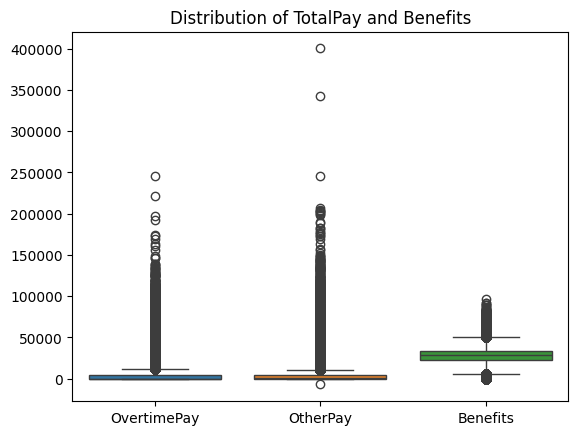

In [193]:
sns.boxplot(data=df[['OvertimePay', 'OtherPay', 'Benefits']]) # BasePay	OvertimePay	OtherPay	Benefits
plt.title("Distribution of TotalPay and Benefits")
plt.show()

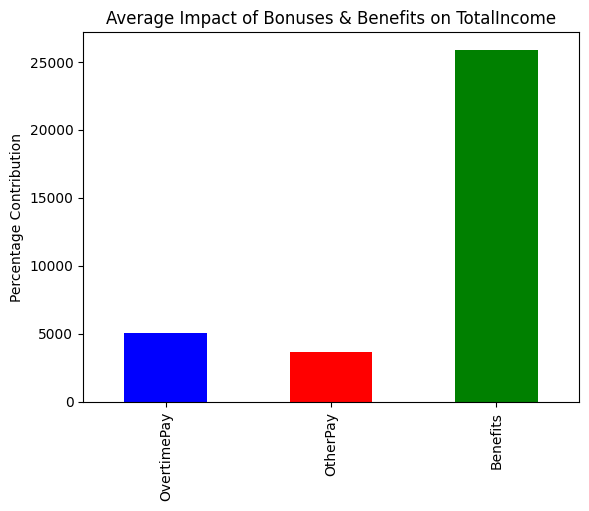

In [195]:
df[['OvertimePay', 'OtherPay', 'Benefits']].mean().plot(kind='bar', color=['blue', 'red', 'green'])
plt.title("Average Impact of Bonuses & Benefits on TotalIncome")
plt.ylabel("Percentage Contribution")
plt.show()

In [206]:
df.to_csv('Salaries data cleaned.csv', index=False)